# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [7]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att12'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

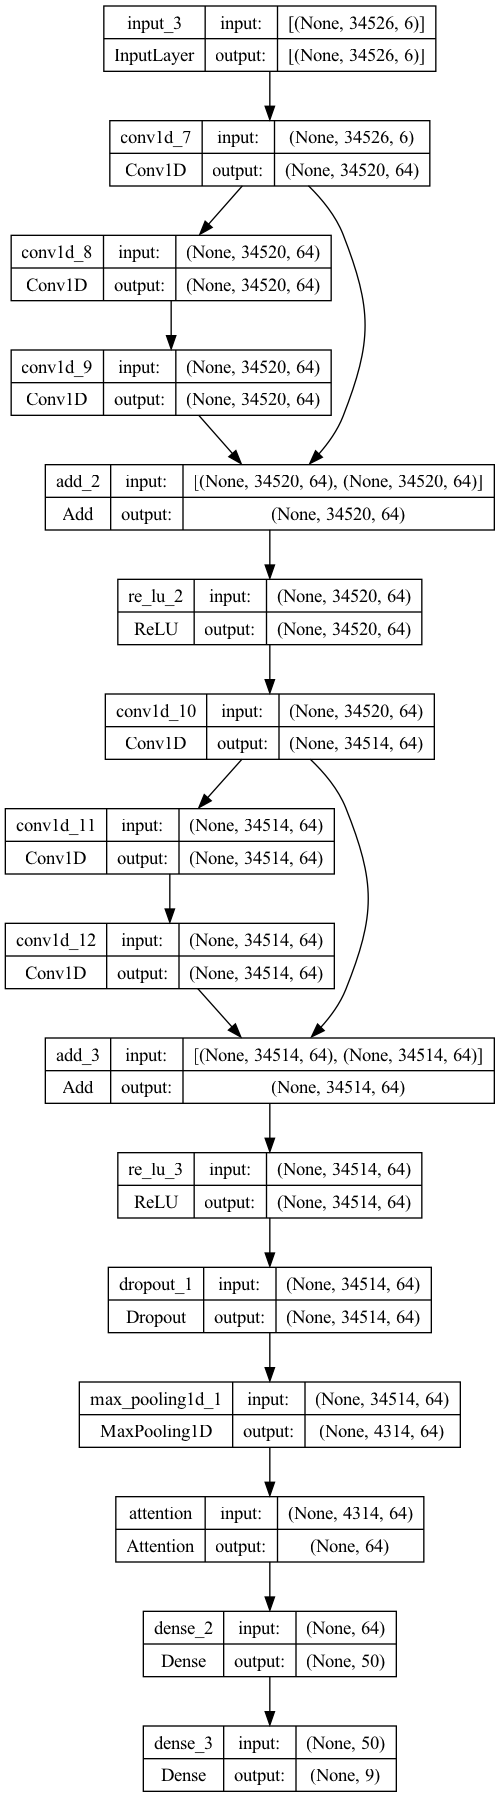

In [8]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d_7 (Conv1D)           (None, 34520, 64)            2688      ['input_3[0][0]']             
                                                                                                  
 conv1d_8 (Conv1D)           (None, 34520, 64)            28736     ['conv1d_7[0][0]']            
                                                                                                  
 conv1d_9 (Conv1D)           (None, 34520, 64)            28736     ['conv1d_8[0][0]']            
                                                                                              

In [10]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 889s 3s/step - loss: 26.0717 - ERM: -0.1221 - KDEL: 0.1525 - LMA: 0.0129 - MITO: -0.0840 - NES: -0.1079 - NIK: -4.9784e-04 - NLS: -0.0521 - NUCP: -0.0288 - OMM: -0.0482 - val_loss: 25.7638 - val_ERM: -0.0264 - val_KDEL: 0.3272 - val_LMA: -0.4717 - val_MITO: 0.4987 - val_NES: -0.2068 - val_NIK: -0.2829 - val_NLS: -0.0334 - val_NUCP: -0.2944 - val_OMM: -0.3420
Epoch 2/10
311/311 [==============================] - 880s 3s/step - loss: 25.2325 - ERM: -0.1477 - KDEL: 0.0991 - LMA: 0.0083 - MITO: 0.0128 - NES: -0.1143 - NIK: -0.0243 - NLS: -0.0465 - NUCP: -0.0443 - OMM: -0.0432 - val_loss: 25.0712 - val_ERM: 0.0275 - val_KDEL: 0.2800 - val_LMA: -0.4111 - val_MITO: 0.5530 - val_NES: -0.0975 - val_NIK: -0.2658 - val_NLS: 0.0570 - val_NUCP: -0.2625 - val_OMM: -0.5142
Epoch 3/10
311/311 [==============================] - 873s 3s/step - loss: 24.6526 - ERM: -0.1466 - KDEL: 0.0509 - LMA: 0.0195 - MITO: 0.0912 - NES: -0.0855 - NIK: -0.0136 - NLS

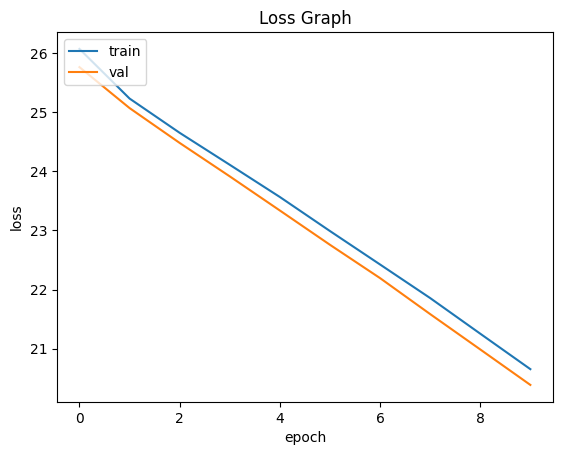

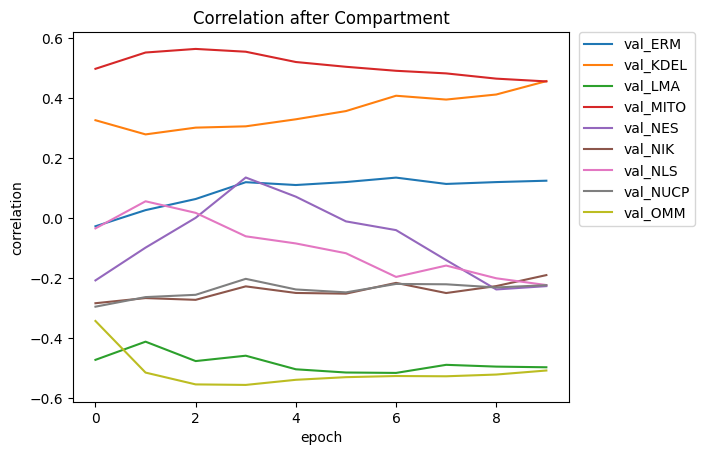

In [13]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history, mean=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

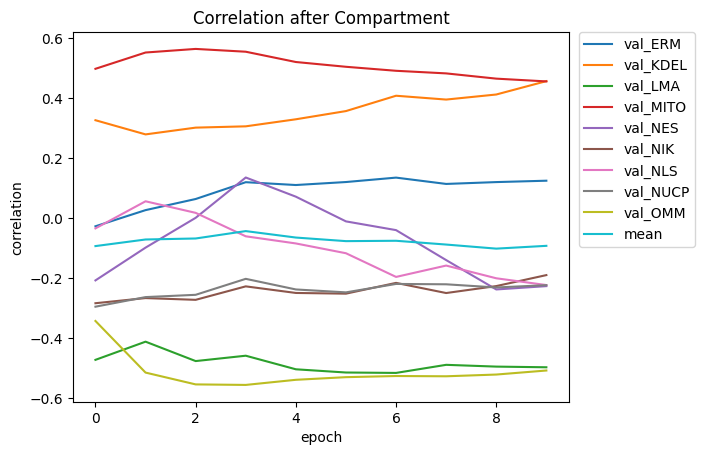

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

def multiplot_pearson(data, mean: bool = True, training: bool = False,title: str = 'Correlation after Compartment'):
    headers = [
               'val_ERM', 'val_KDEL', 'val_LMA', 'val_MITO', 'val_NES', 'val_NIK', 'val_NLS', 'val_NUCP', 'val_OMM'
               ]
    if training:
        headers = ['ERM', 'KDEL', 'LMA', 'MITO', 'NES', 'NIK', 'NLS', 'NUCP', 'OMM'].extend(headers)
    data_list = [data[ind] for ind in headers]
    data_panda = np.array(data_list).transpose()
    if mean:
        mean_vals = np.mean(data_panda, axis=1)
        data_panda = np.hstack([data_panda, np.expand_dims(mean_vals, axis=1)])
        headers.append('mean')
    data_panda = np.hstack([data_panda, np.expand_dims(list(range(len(data['loss']))), axis=1)])
    headers.append('epoch')
    dataframe = pd.DataFrame(data_panda, columns=headers)
    plot_data = dataframe.melt(id_vars=['epoch'], var_name='compartment', value_name='correlation')
    return sns.lineplot(plot_data, x='epoch', y='correlation', hue='compartment').set(title=title)

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

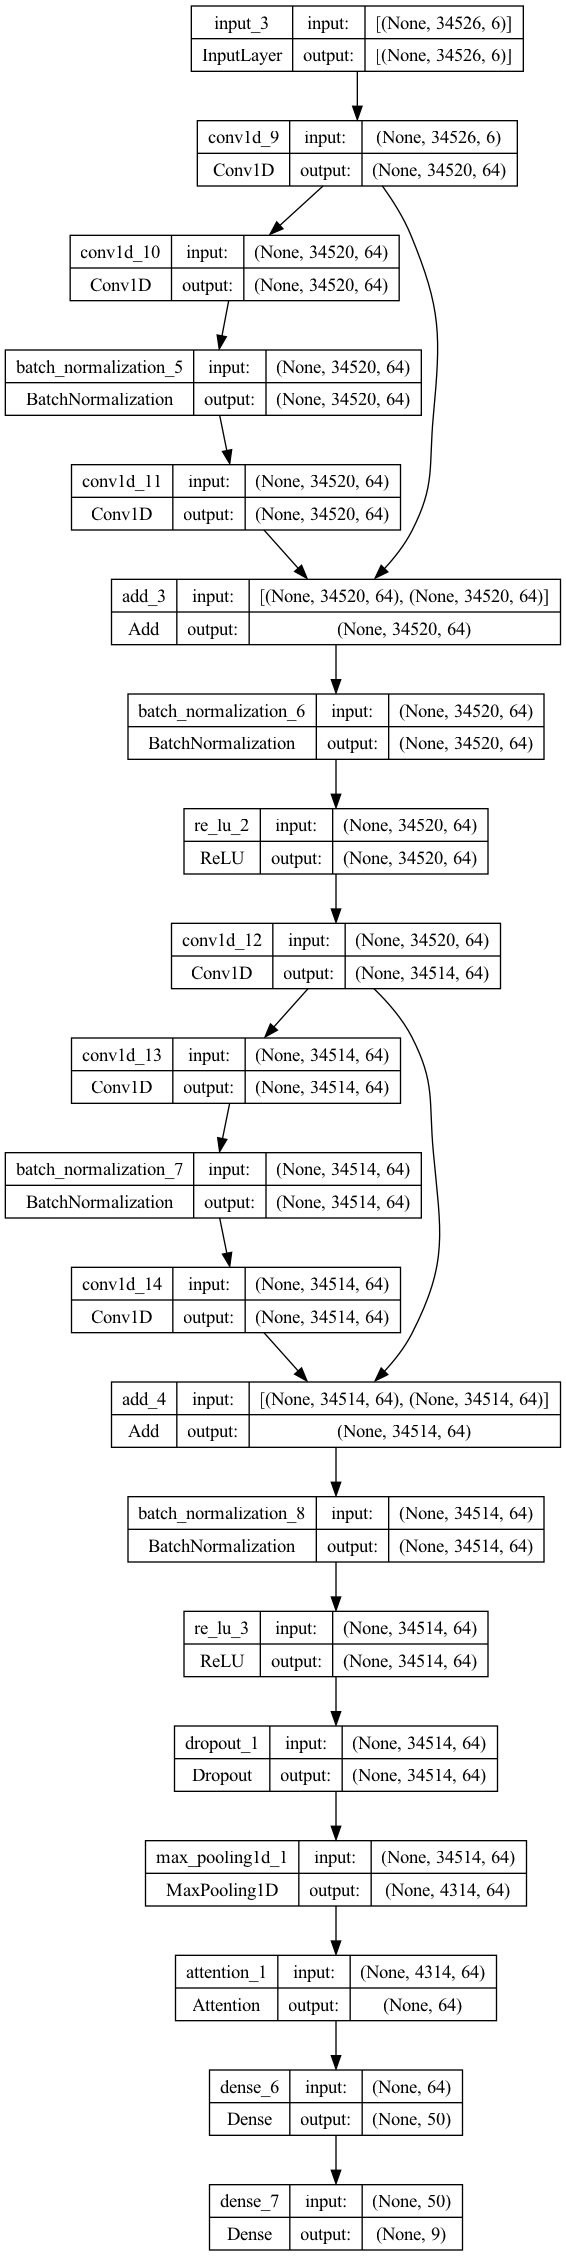

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)